In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
from datetime import datetime
import seaborn as sn

In [2]:
df = pd.read_csv('G_PSQL_data/JAN_sample_raw.txt')

df = remove_outliers(df)


C:\Users\broug\AppData\Local\Temp\ipykernel_7692\1938849531.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('G_PSQL_data/JAN_sample_raw.txt')


In [12]:
sample.drop(columns=['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time', 'no_name', 'longest_add_gtime', 'total_add_gtime', 'canellation_code', 'dup', 'diverted', 'cancelled'], inplace=True)

In [3]:
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-01-01,NK,NK,NK,955,NK,N507NK,955,12892,LAX,...,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,AA,AA_CODESHARE,AA,5216,OH,N256PS,5216,11278,DCA,...,313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,AA,AA_CODESHARE,AA,5225,OH,N594NN,5225,11057,CLT,...,761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,AA,AA_CODESHARE,AA,5227,OH,N573NN,5227,11057,CLT,...,651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,NK,NK,NK,811,NK,N640NK,811,13204,MCO,...,1189,3.0,0.0,14.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112181,2018-01-31,DL,DL_CODESHARE,DL,6283,G7,N658CA,6283,13487,MSP,...,980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112182,2018-01-31,DL,DL_CODESHARE,DL,6284,G7,N340CA,6284,10693,BNA,...,442,0.0,0.0,0.0,0.0,64.0,NaN,NaN,NaN,NaN
112183,2018-01-31,DL,DL_CODESHARE,DL,6285,G7,N668CA,6285,13244,MEM,...,610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112188,2018-01-31,DL,DL_CODESHARE,DL,5793,CP,N610CZ,5793,12889,LAS,...,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
sample['dep_time'] = pd.to_datetime(sample['dep_time'], format='%H%M', errors='coerce')
sample['arr_time'] = pd.to_datetime(sample['arr_time'], format='%H%M', errors='coerce')

In [18]:
nulls = sample.isnull().sum()
(nulls / len(sample) * 100).sort_values(ascending=False)

arr_time               2.006382
arr_delay              1.787115
air_time               1.770180
actual_elapsed_time    1.770180
dep_time               1.605284
taxi_in                1.602610
wheels_on              1.600827
dep_delay              1.578544
taxi_out               1.559826
wheels_off             1.558043
tail_num               0.368119
crs_elapsed_time       0.000891
cancelled              0.000000
dup                    0.000000
crs_arr_time           0.000000
flights                0.000000
diverted               0.000000
fl_date                0.000000
mkt_unique_carrier     0.000000
crs_dep_time           0.000000
dest_city_name         0.000000
dest                   0.000000
dest_airport_id        0.000000
origin_city_name       0.000000
origin                 0.000000
origin_airport_id      0.000000
op_carrier_fl_num      0.000000
op_unique_carrier      0.000000
mkt_carrier_fl_num     0.000000
mkt_carrier            0.000000
branded_code_share     0.000000
distance

In [22]:
from functions import rename_brand_code, remove_outliers
sample = rename_brand_code(sample)

In [24]:
sample = remove_outliers(sample)

In [3]:
sample.drop(columns='Unnamed: 0', inplace=True)

In [178]:
# distance is split into quantiles which correspond to 31-416, 417-867, 868, 4963
from functions import process_distance
df = process_distance(df)

TypeError: an integer is required (got type str)

In [6]:
sample.to_csv('G_PSQL_data/JAN_sample_processing.csv', index=False)

In [14]:
newdf.to_csv('G_PSQL_data/jan_cleaned.csv', index=False)

#### passenger table processing

In [68]:
sample = pd.read_csv('G_PSQL_data/JAN_passengers.txt', parse_dates=True)

In [69]:
flights = pd.read_csv('G_PSQL_data/super_cleaned.csv')
flights

,fl_date,mkt_unique_carrier,op_unique_carrier,origin,dest,dist_cats,origin_airport_id,dest_airport_id,arr_delay,crs_elapsed_time,dep_hour,arr_hour,week_day
0,2019-01-01 00:01:00,NK,NK,LAX,OAK,short,12892,13796,-6.0,81.0,19,20,1
1,2019-01-01 00:01:00,AA,OH,DCA,BDL,short,11278,10529,-15.0,75.0,13,13,1
2,2019-01-01 00:01:00,AA,OH,CLT,BTV,medium,11057,10785,-16.0,132.0,18,20,1
3,2019-01-01 00:01:00,AA,OH,CLT,MKE,medium,11057,13342,-20.0,136.0,16,17,1
4,2019-01-01 00:01:00,NK,NK,MCO,SJU,long,13204,14843,17.0,155.0,23,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108432,2018-01-31 00:01:00,DL,G7,MSP,RDU,long,13487,14492,-33.0,161.0,15,18,2
108433,2018-01-31 00:01:00,DL,G7,BNA,RDU,medium,10693,14492,64.0,225.0,20,22,2
108434,2018-01-31 00:01:00,DL,G7,MEM,DTW,medium,13244,11433,-21.0,119.0,6,8,2
108435,2018-01-31 00:01:00,DL,CP,LAS,LAX,short,12889,12892,-7.0,90.0,9,10,2


In [70]:
sample = sample[sample['year'] > 2016]

In [62]:
sample = sample[(sample['dest_country_name'] =='United States') & (sample['origin_country_name'] == 'United States')]

In [66]:
sample.drop(columns=['dest_country', 'dest_country_name', 'origin_country_name', 'origin_country', 'data_source'], inplace=True)

C:\Users\broug\AppData\Local\Temp\ipykernel_336\1267708381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample.drop(columns=['dest_country', 'dest_country_name', 'origin_country_name', 'origin_country', 'data_source'], inplace=True)


In [136]:
sample = sample[(sample['dest_country'] == 'US') & (sample['origin_country'] == 'US')]

In [144]:
sample['op_unique_carrier'] = sample['unique_carrier']

C:\Users\broug\AppData\Local\Temp\ipykernel_336\2854837492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['op_unique_carrier'] = sample['unique_carrier']


In [89]:
df.drop(columns=['year', 'month'], inplace=True)

In [91]:
df.to_csv('G_PSQL_data/flights_passengers.csv', index=False)

In [134]:
df['total_passengers'] = df['passengers']

In [148]:
dest_airport = df.groupby(['dest_airport_id'], as_index=False).agg({'passengers': 'sum', 'mail': 'mean', 'freight': 'mean', 'arr_delay': 'mean', 'unique_carrier': 'count'}).sort_values(by='passengers', ascending=False)

In [149]:
origin_airport = df.groupby('origin_airport_id', as_index=False).agg({'passengers': 'sum', 'mail': 'mean', 'freight': 'mean', 'arr_delay': 'mean', 'unique_carrier': 'size'})

In [151]:
origin_airport['cargo'] = origin_airport['mail'] + origin_airport['freight']

In [152]:
origin_airport['cargo/carrier'] = origin_airport['cargo'] / origin_airport['unique_carrier']
origin_airport['passengers/carrier'] = origin_airport['passengers'] / origin_airport['unique_carrier']
origin_airport['cargo/passengers'] = origin_airport['cargo'] / origin_airport['passengers'] 
origin_airport.drop(columns=['mail', 'freight'], inplace=True)
origin_airport

,origin_airport_id,passengers,arr_delay,unique_carrier,cargo,cargo/carrier,passengers/carrier,cargo/passengers
0,10135,495119,11.238754,289,19.166090,0.066319,1713.214533,0.000039
1,10136,421992,11.861111,216,355.333333,1.645062,1953.666667,0.000842
2,10140,10211746,-2.496269,3752,43383.426439,11.562747,2721.680704,0.004248
3,10141,50479,-4.727273,22,0.000000,0.000000,2294.500000,0.000000
4,10146,81284,-6.357143,42,0.000000,0.000000,1935.333333,0.000000
...,...,...,...,...,...,...,...,...
355,15841,26158,-11.666667,36,10507.055556,291.862654,726.611111,0.401677
356,15919,3122420,1.142930,1952,97.253074,0.049822,1599.600410,0.000031
357,15991,8329,-15.393939,33,7836.939394,237.483012,252.393939,0.940922
358,16101,347598,2.925926,54,820.000000,15.185185,6437.000000,0.002359


In [162]:
origin_airport.sort_values(by='arr_delay', ascending=False)

,origin_airport_id,passengers,arr_delay,unique_carrier,cargo,cargo/carrier,passengers/carrier,cargo/passengers
244,13832,1916,92.000000,3,0.000000,0.000000,638.666667,0.000000
254,14006,24814,39.160000,25,0.000000,0.000000,992.560000,0.000000
158,12244,58475,39.043478,46,345.543478,7.511815,1271.195652,0.005909
17,10333,5261,39.000000,20,0.000000,0.000000,263.050000,0.000000
275,14259,8319,35.333333,12,0.000000,0.000000,693.250000,0.000000
...,...,...,...,...,...,...,...,...
314,14802,1389,-17.333333,3,0.000000,0.000000,463.000000,0.000000
274,14256,41207,-18.190476,63,12229.873016,194.124969,654.079365,0.296791
329,15008,8506,-18.666667,6,0.000000,0.000000,1417.666667,0.000000
180,12519,11116,-22.625000,16,0.000000,0.000000,694.750000,0.000000


<AxesSubplot:xlabel='passengers', ylabel='arr_delay'>

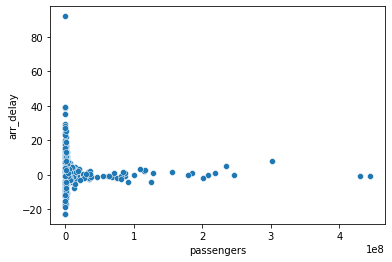

In [172]:
sn.scatterplot(x=origin_airport['passengers'], y=origin_airport['arr_delay'])

In [191]:
df = pd.read_csv('G_PSQL_data/JAN_sample_no_outliers.csv')
df = df[df['crs_elapsed_time'] < 500]

In [192]:
df['dist_cats'] = pd.qcut(df['distance'], 3, labels=['short', 'medium', 'long'])


In [193]:
df['fl_date'] = pd.to_datetime(df['fl_date'], format='%Y-%m-%d', errors='coerce')

In [194]:
df.drop(columns='Unnamed: 0', inplace=True)

In [209]:
df.to_csv('final_process.csv', index=False)

#### hourly flights

In [198]:
df = pd.read_csv('final_process.csv')

In [1]:
df = pd.read_csv('G_PSQL_data/JAN_sample_raw.txt', parse_dates=['crs_dep_time', 'crs_arr_time'])

NameError: name 'pd' is not defined

In [5]:
df['late_binary'] = 0
late = df['arr_delay'] > 0
df.loc[late, 'late_binary'] = 1

In [59]:
from functions import *


In [13]:
from functions import *
big = process_times(big)
big = remove_outliers(big)
big = process_binary(big)
big = airport_hour_avgs(big)
big = tail_num_avg(big)
big = process_carriers(big)
big = process_hourly(big)
big = process_weekly(big)
big = process_routes(big)

In [14]:
big = big.dropna()

#### airport table

In [21]:
airports = df.groupby('dest_airport_id').agg(late=('late_binary', 'sum'), total=('late_binary', 'size'))
airports['total_percent_late'] = (airports['late'] / airports['total']) * 100
airports.drop(columns=['total', 'late'], inplace=True)

In [38]:
df.groupby(['dest_airport_id', 'weekday', 'arr_hour'], as_index=False).agg(airport_weekly_hourly_arr=('arr_delay', 'mean'))

,dest_airport_id,weekday,arr_hour,airport_weekly_hourly_arr
0,10135,0,10.0,-3.50
1,10135,0,12.0,86.00
2,10135,0,16.0,16.00
3,10135,0,17.0,9.75
4,10135,0,19.0,-26.00
...,...,...,...,...
18776,16218,6,0.0,-4.00
18777,16218,6,11.0,28.00
18778,16218,6,16.0,-8.00
18779,16218,6,17.0,-5.50


In [ ]:
df.drop(columns=['fl_date','op_carrier_fl_num','taxi_out','taxi_in','taxi_total',

In [6]:
reduced_delay_flight = df['arr_delay'] < df['dep_delay']
df['reduced_delay_flight'] = 0
df.loc[reduced_delay_flight, 'reduced_delay_flight'] = 1

In [30]:
carrier_times = df.groupby('op_unique_carrier', as_index=False).agg(avg_actual=('actual_elapsed_time', 'mean'), pred=('crs_elapsed_time', 'mean'))
carrier_times['carrier_air_precent'] = carrier_times['avg_actual'] / carrier_times['pred'] * 100
carrier_times = carrier_times.drop(columns=['avg_actual', 'pred'])
df = df.merge(carrier_times, on='op_unique_carrier')
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,weekday_arr,weekday_dep,weekday_taxi,weekly_percent_late,weekly_reduced_delay,route_arr_mean,route_dep_mean,actual_pred_ratio,carrier_air_ratio,carrier_air_precent
0,2019-01-01,NK,NK,NK,955,NK,N507NK,955,12892,LAX,...,-2.776027,3.123535,25.573730,30.792665,72.722479,-8.053191,3.106383,0.966081,0.966081,96.608107
1,2018-01-16,NK,NK,NK,957,NK,N507NK,957,12892,LAX,...,-2.776027,3.123535,25.573730,30.792665,72.722479,-8.053191,3.106383,0.966081,0.966081,96.608107
2,2019-01-01,NK,NK,NK,949,NK,N528NK,949,12892,LAX,...,-2.776027,3.123535,25.573730,30.792665,72.722479,-8.053191,3.106383,0.966081,0.966081,96.608107
3,2018-01-30,NK,NK,NK,949,NK,N522NK,949,12892,LAX,...,-2.776027,3.123535,25.573730,30.792665,72.722479,-8.053191,3.106383,0.966081,0.966081,96.608107
4,2019-01-30,NK,NK,NK,955,NK,N507NK,955,12892,LAX,...,-2.554070,3.162687,25.445354,31.392668,71.305050,-8.053191,3.106383,0.966081,0.966081,96.608107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105813,2019-01-11,AS,AS_CODESHARE,AS,3277,KS,N682PA,3277,11445,DUT,...,-2.349179,3.594942,25.563852,32.238785,71.511987,20.428571,37.928571,0.997333,0.997333,99.733333
105814,2019-01-05,AS,AS_CODESHARE,AS,3299,KS,N682PA,3299,11445,DUT,...,-5.465436,1.746958,24.341880,26.400070,75.000000,20.428571,37.928571,0.997333,0.997333,99.733333
105815,2019-01-06,AS,AS_CODESHARE,AS,3281,KS,N687PA,3281,11445,DUT,...,-3.108768,3.244909,25.184758,31.135775,72.830189,20.428571,37.928571,0.997333,0.997333,99.733333
105816,2018-01-28,AS,AS_CODESHARE,AS,3287,KS,N681PA,3287,11445,DUT,...,-3.108768,3.244909,25.184758,31.135775,72.830189,20.428571,37.928571,0.997333,0.997333,99.733333


In [52]:
test3 = df.drop(columns=['fl_date', 'weekday', 'op_unique_carrier', 'op_carrier_fl_num','origin_airport_id', 'dest_airport_id', 'dep_delay','mkt_unique_carrier','tail_num', 'dest_airport_id','origin_airport_id', 'branded_code_share', 'mkt_carrier','mkt_carrier_fl_num','origin', 'origin_city_name','dest', 'dest_city_name', 'crs_dep_time', 'dep_time','taxi_out', 'wheels_off', 'wheels_on', 'taxi_in','crs_arr_time', 'arr_time','cancelled','cancellation_code', 'diverted', 'dup', 'crs_elapsed_time','actual_elapsed_time', 'air_time', 'flights', 'distance','carrier_delay', 'weather_delay', 'nas_delay', 'security_delay','late_aircraft_delay', 'first_dep_time', 'total_add_gtime','longest_add_gtime', 'no_name','late_binary','month_day','taxi_total'])
test3

,arr_delay,dep_hour,arr_hour,reduced_delay_flight,airport_weekly_hourly_arr,airport_weekly_hourly_dep,airport_arr_hourly_late_percent,airport_dep_hourly_late_percent,arr_taxi,dep_taxi,...,route_dep_mean,actual_pred_ratio,carrier_air_ratio,carrier_air_precent,carrier_route_arr_mean,carrier_route_dep_mean,carrier_route_air_ratio,tail_route_arr_mean,tail_route_dep_mean,tail_route_air_ratio
0,-6.0,19.0,20.0,1,-4.100000,7.576923,41.071429,37.837838,5.795367,18.712301,...,3.106383,0.966081,0.966081,96.608107,-6.722222,-0.777778,92.937294,7.5,15.000000,90.963855
1,-18.0,16.0,17.0,1,-8.000000,1.057143,35.294118,31.958763,5.795367,18.712301,...,3.106383,0.966081,0.966081,96.608107,-6.722222,-0.777778,92.937294,7.5,15.000000,90.963855
2,-10.0,19.0,20.0,1,-6.444444,9.920000,41.071429,37.837838,5.795367,18.712301,...,3.106383,0.966081,0.966081,96.608107,-6.722222,-0.777778,92.937294,7.5,15.000000,90.963855
3,64.0,7.0,8.0,1,0.777778,-0.437500,15.789474,25.130890,5.795367,18.712301,...,3.106383,0.966081,0.966081,96.608107,-6.722222,-0.777778,92.937294,7.5,15.000000,90.963855
4,6.0,7.0,9.0,0,-4.000000,-1.076923,10.869565,25.130890,5.795367,18.712301,...,3.106383,0.966081,0.966081,96.608107,-6.722222,-0.777778,92.937294,6.0,-1.000000,108.433735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105813,10.0,11.0,13.0,1,-1.000000,16.000000,45.454545,75.000000,4.415179,4.785714,...,37.928571,0.997333,0.997333,99.733333,20.428571,37.928571,88.333333,46.5,59.500000,91.333333
105814,83.0,11.0,13.0,1,12.333333,103.000000,45.454545,75.000000,4.415179,4.785714,...,37.928571,0.997333,0.997333,99.733333,20.428571,37.928571,88.333333,46.5,59.500000,91.333333
105815,50.0,18.0,20.0,1,50.000000,64.000000,57.142857,75.000000,4.415179,4.785714,...,37.928571,0.997333,0.997333,99.733333,20.428571,37.928571,88.333333,15.0,34.333333,87.111111
105816,17.0,18.0,20.0,1,33.000000,41.000000,57.142857,75.000000,4.415179,4.785714,...,37.928571,0.997333,0.997333,99.733333,20.428571,37.928571,88.333333,15.0,34.333333,87.111111


In [53]:
test3.to_csv('G_PSQL_data/test3.csv', index=False)

In [16]:
routes = df.groupby(['origin_airport_id', 'dest_airport_id'], as_index=False).agg(route_arr_mean=('arr_delay', 'mean'), route_dep_mean=('dep_delay', 'mean'))
df = df.merge(routes, on=['origin_airport_id', 'dest_airport_id'])


In [47]:
tail_route_times = df.groupby(['tail_num', 'origin_airport_id', 'dest_airport_id'], as_index=False).agg(tail_route_arr_mean=('arr_delay', 'mean'), tail_route_dep_mean=('dep_delay', 'mean'), tail_route_actual=('actual_elapsed_time', 'mean'), tail_route_pred=('crs_elapsed_time', 'mean'))
tail_route_times['tail_route_air_ratio'] = tail_route_times['tail_route_actual'] / tail_route_times['tail_route_pred'] * 100
tail_route_times = tail_route_times.drop(columns=['tail_route_actual', 'tail_route_pred'])
df = df.merge(tail_route_times, on=['tail_num', 'origin_airport_id', 'dest_airport_id'])

In [36]:
df.to_csv('G_PSQL_data/new_processed.csv', index=False)

In [27]:
test.columns

Index(['arr_delay', 'dep_hour', 'weekday', 'reduced_delay_flight',
       'airport_weekly_hourly_arr', 'airport_weekly_hourly_dep',
       'airport_arr_hourly_late_percent', 'airport_dep_hourly_late_percent',
       'arr_taxi', 'dep_taxi', 'tail_arr', 'tail_dep', 'tail_taxi',
       'tail_precent_late', 'tail_percent_reduce_delay', 'carrier_arr',
       'carrier_dep', 'carrier_percent_late', 'carrier_taxi_total',
       'percent_carrier_delay_reduced', 'weekday_arr', 'weekday_dep',
       'weekday_taxi', 'weekly_percent_late', 'weekly_reduced_delay',
       'route_arr_mean', 'route_dep_mean'],
      dtype='object')

In [51]:
df = df.rename(columns={'carrier_route_air_ratio_x': 'carrier_route_air_ratio'})

In [8]:
big = pd.read_csv('G_PSQL_data/jan_sample_big.txt')

In [16]:
big.to_csv('big.csv', index=False)

In [19]:
big.nunique()

fl_date                               62
op_unique_carrier                     28
tail_num                            6071
origin_airport_id                    363
dest_airport_id                      363
crs_dep_time                        1255
dep_time                            1419
dep_delay                            189
taxi_out                             139
taxi_in                              108
crs_arr_time                        1356
arr_time                            1433
arr_delay                            149
crs_elapsed_time                     433
actual_elapsed_time                  485
dep_hour                              24
arr_hour                              24
weekday                                7
month_day                             31
late_binary                            2
reduced_delay_flight                   2
airport_weekly_hourly_arr           7582
airport_weekly_hourly_dep           7238
airport_arr_hourly_late_percent     1520
airport_dep_hour

In [137]:

air_traffic = pd.read_csv('G_PSQL_data/air_traffic_binned.csv')
airline_delay = pd.read_csv('G_PSQL_data/airline_delay_rating.csv')
airline_delay2 = pd.read_csv('G_PSQL_data/airline_delay_rating (2).csv')
monthly_delay_rating = pd.read_csv('G_PSQL_data/month_delay_rated.csv')
weather_test = pd.read_csv('G_PSQL_data/weather_test.csv')
weather_train = pd.read_csv('G_PSQL_data/weather_train.csv')
test = pd.read_csv('G_PSQL_data/flights_TEST.txt')
weather2019 = pd.read_csv('G_PSQL_data/weather_dec2019.csv')
weather20192 = pd.read_csv('weather_dec2019.csv')

In [138]:
df = pd.read_csv('G_PSQL_data/final_dataset.txt')

In [139]:
airtraffic = pd.read_csv('G_PSQL_data/final_airtraffic.csv')

In [100]:
decnew

,fl_date,origin_city_name,dest_city_name,dest_city_name.1,origin,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time
0,2019-12-01,"Escanaba, MI","Detroit, MI","Detroit, MI",ESC,OO,N944SW,11587,11433,1020,NaN,NaN,NaN,NaN,1138,NaN,NaN,78.0,NaN
1,2019-12-01,"San Francisco, CA","San Antonio, TX","San Antonio, TX",SFO,OO,N213SY,14771,14683,1040,NaN,NaN,NaN,NaN,1627,NaN,NaN,227.0,NaN
2,2019-12-01,"Kearney, NE","Denver, CO","Denver, CO",EAR,OO,N223JS,11468,11292,1607,NaN,NaN,NaN,NaN,1634,NaN,NaN,87.0,NaN
3,2019-12-01,"San Francisco, CA","Tucson, AZ","Tucson, AZ",SFO,OO,N904EV,14771,15376,1347,NaN,NaN,NaN,NaN,1704,NaN,NaN,137.0,NaN
4,2019-12-01,"Los Angeles, CA","New York, NY","New York, NY",LAX,AS,N260AK,12892,12478,1530,NaN,NaN,NaN,NaN,2351,NaN,NaN,321.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662320,2019-12-08,"Seattle, WA","Spokane, WA","Spokane, WA",SEA,QX,N625QX,14747,11884,1340,1343.0,3.0,18.0,4.0,1444,1444.0,0.0,64.0,61.0
662321,2019-12-08,"San Diego, CA","Kansas City, MO","Kansas City, MO",SAN,QX,N620QX,14679,13198,1045,NaN,NaN,NaN,NaN,1608,NaN,NaN,203.0,NaN
662322,2019-12-08,"Kansas City, MO","San Diego, CA","San Diego, CA",MCI,QX,N620QX,13198,14679,1655,1716.0,21.0,14.0,2.0,1832,1924.0,52.0,217.0,248.0
662323,2019-12-08,"Spokane, WA","Seattle, WA","Seattle, WA",GEG,QX,N624QX,11884,14747,500,507.0,7.0,12.0,16.0,623,617.0,-6.0,83.0,70.0


In [140]:
from functions import process_times
df = process_times(df)
df = df[df['month_day'] > 14]
df['fl_date'] = pd.to_datetime(df['fl_date'], format='%Y-%m-%d')
weather_train['fl_date'] = pd.to_datetime(weather_train['datetime'], format='%Y-%m-%d')
weather2019['fl_date'] = pd.to_datetime(weather2019['datetime'], format='%Y-%m-%d')
weather_test['fl_date'] = pd.to_datetime(weather_test['datetime'], format='%Y-%m-%d')
weather_train.drop(columns='Unnamed: 0', inplace = True)
weather_test.drop(columns='Unnamed: 0', inplace = True)
weather2019['dest_weather'] = weather2019['conditions']
weather2019['origin_city_name'] = weather2019['name']
weather2019['dest_city_name'] = weather2019['name']
weather_train['origin_weather'] = weather_train['conditions']
weather_test['origin_weather'] = weather_test['conditions']
weather_train['origin_city_name'] = weather_train['name']
weather_test['origin_city_name'] = weather_test['name']
weather2019.drop(columns=['name', 'conditions'], inplace = True)
weatherdest2019 = weather2019[['dest_weather', 'fl_date', 'dest_city_name']]
#weatherorig2019 = weather2019[['origin_weather', 'fl_date', 'origin_city_name']]
weather_test.rename(columns={'conditions': 'dest_weather', 'name': 'dest_city_name'}, inplace=True)
weather_train.rename(columns={'conditions': 'dest_weather', 'name': 'dest_city_name'}, inplace=True)
traindw = weather_train[['dest_weather', 'fl_date', 'dest_city_name']]
trainow = weather_train[['origin_weather', 'fl_date', 'origin_city_name']]

In [141]:
df = df.merge(weatherdest2019, on=['dest_city_name','fl_date'], how='left')

In [130]:
air_traffic

,origin,flight_bins
0,IFP,1
1,AKN,1
2,ROP,1
3,BFM,1
4,DLG,1
...,...,...
370,CLT,4
371,DEN,4
372,DFW,4
373,ATL,4


In [57]:
df.dtypes

fl_date                 object
origin_city_name        object
dest_city_name          object
dest_city_name.1        object
origin                  object
op_unique_carrier       object
tail_num                object
origin_airport_id        int64
dest_airport_id          int64
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
crs_elapsed_time       float64
actual_elapsed_time    float64
dep_hour               float64
arr_hour               float64
weekday                  int64
month_day                int64
dtype: object

In [97]:
#test = pd.read_csv('G_PSQL_data/flights_TEST.txt')
test

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,month,year,day
0,1577865600000,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,...,"San Francisco, CA",1810,1945,N,95,1,363,1,2020,1
1,1577865600000,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,...,"San Francisco, CA",1150,1320,N,90,1,363,1,2020,1
2,1577865600000,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,...,"San Jose, CA",2020,2130,N,70,1,333,1,2020,1
3,1577865600000,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,...,"San Jose, CA",1340,1455,N,75,1,333,1,2020,1
4,1577865600000,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,...,"San Jose, CA",915,1035,N,80,1,333,1,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150618,1578384000000,UA,UA,UA,213,UA,N587UA,213,14771,SFO,...,"Newark, NJ",1615,32,N,317,1,2565,1,2020,7
150619,1578384000000,UA,UA,UA,212,UA,N810UA,212,13303,MIA,...,"Washington, DC",1355,1625,N,150,1,921,1,2020,7
150620,1578384000000,UA,UA,UA,212,UA,N810UA,212,13930,ORD,...,"Miami, FL",855,1308,N,193,1,1197,1,2020,7
150621,1578384000000,UA,UA,UA,210,UA,N77536,210,10423,AUS,...,"Newark, NJ",1708,2145,N,217,1,1504,1,2020,7


In [148]:
test['fl_date'] = test['year'].astype(str)+'-'+test['month'].astype(str)+'-'+test['day'].astype(str)
test['fl_date'] = pd.to_datetime(test['fl_date'], format='%Y-%m-%d')

test = test.merge(weather_test.drop(columns=['datetime', 'origin_city_name', 'origin_weather']), on=['fl_date', 'dest_city_name'], how='left')
test = test.merge(weather_test.drop(columns=['datetime', 'dest_weather', 'dest_city_name']), on=['fl_date', 'origin_city_name'], how='left')

,dest_city_name,datetime,dest_weather,fl_date,origin_weather,origin_city_name
0,"Waterloo, IA",2020-01-01,0,2020-01-01,0,"Waterloo, IA"
1,"Waterloo, IA",2020-01-02,1,2020-01-02,1,"Waterloo, IA"
2,"Waterloo, IA",2020-01-03,3,2020-01-03,3,"Waterloo, IA"
3,"Waterloo, IA",2020-01-04,3,2020-01-04,3,"Waterloo, IA"
4,"Waterloo, IA",2020-01-05,3,2020-01-05,3,"Waterloo, IA"
...,...,...,...,...,...,...
2529,"Rochester, NY",2020-01-03,1,2020-01-03,1,"Rochester, NY"
2530,"Rochester, NY",2020-01-04,3,2020-01-04,3,"Rochester, NY"
2531,"Rochester, NY",2020-01-05,3,2020-01-05,3,"Rochester, NY"
2532,"Rochester, NY",2020-01-06,3,2020-01-06,3,"Rochester, NY"


In [142]:
airline_delay = airline_delay.rename(columns={'Unnamed: 0': 'op_unique_carrier', '0': 'airline_delay_category'})
df = df.merge(airline_delay, on='op_unique_carrier', how='left')

In [127]:
air_traffic.drop(columns=['Unnamed: 0', 'index'], inplace=True)
df = df.merge(air_traffic, on='origin', how='left')

In [146]:
df = df.merge(airtraffic, on='origin_airport_id')

In [145]:
df

,fl_date,mkt_carrier_fl_num,origin_city_name,dest_city_name,dest_city_name.1,origin,op_unique_carrier,tail_num,origin_airport_id,dest_airport_id,...,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,dep_hour,arr_hour,weekday,month_day,dest_weather,airline_delay_category
0,2019-12-15,1586,"Greer, SC","Dallas/Fort Worth, TX","Dallas/Fort Worth, TX",GSP,AA,N938NN,11996,11298,...,940.0,12.0,170,183.0,8.0,9.0,6,15,1.0,3
1,2019-12-15,1587,"New York, NY","Phoenix, AZ","Phoenix, AZ",JFK,AA,N852NN,12478,14107,...,2055.0,42.0,348,385.0,16.0,20.0,6,15,0.0,3
2,2019-12-15,1590,"Cleveland, OH","Dallas/Fort Worth, TX","Dallas/Fort Worth, TX",CLE,AA,N989NN,11042,11298,...,828.0,6.0,192,199.0,6.0,8.0,6,15,1.0,3
3,2019-12-15,1591,"San Juan, PR","Dallas/Fort Worth, TX","Dallas/Fort Worth, TX",SJU,AA,N915AN,14843,11298,...,1009.0,-18.0,322,310.0,7.0,10.0,6,15,1.0,3
4,2019-12-15,1593,"Austin, TX","Miami, FL","Miami, FL",AUS,AA,N9015D,10423,13303,...,854.0,-15.0,157,148.0,6.0,9.0,6,15,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364448,2019-12-30,1680,"Philadelphia, PA","Chicago, IL","Chicago, IL",PHL,AA,N984NN,14100,13930,...,2259.0,5.0,149,162.0,21.0,23.0,0,30,3.0,3
364449,2019-12-30,1681,"Miami, FL","New York, NY","New York, NY",MIA,AA,N864NN,13303,12478,...,107.0,-29.0,174,156.0,23.0,13.0,0,30,2.0,3
364450,2019-12-30,1682,"Fort Lauderdale, FL","Philadelphia, PA","Philadelphia, PA",FLL,AA,N554UW,11697,14100,...,1115.0,-18.0,163,152.0,9.0,12.0,0,30,2.0,3
364451,2019-12-30,1683,"Austin, TX","Philadelphia, PA","Philadelphia, PA",AUS,AA,N957UW,10423,14100,...,1723.0,25.0,197,200.0,13.0,17.0,0,30,2.0,3


In [150]:
test = test.merge(airtraffic, on='origin_airport_id', how='left')

In [14]:
test.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance',
       'month', 'year', 'day'],
      dtype='object')

In [151]:
test.to_csv('G_PSQL_data/final_flight_test.csv', index=False)

In [ ]:
df.to_csv('G_PSQL_data/final_flight.csv', index=False)